In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, issparse
from scipy.sparse.linalg import norm as spnorm
import pickle
import sklearn
from scipy import sparse
from ntf_cython.random import algo42, algo44, admm, rel_error
from nmf_compressed.compression import algo41, algo43, algo45, algo46, structured_compression, count_gauss
from sklearn.decomposition.nmf import _initialize_nmf
from nmf_compressed.structured_nmf import structured_randomized_bppnmf
from numpy.linalg import norm, solve
from ntf_cython.nmf import nmf

%matplotlib inline

## Using Randomly Generated Synthetic Data

In [21]:
m = 10000
n = 1000
np.random.seed(0)
A = np.abs(np.random.randn(m, n))
r = 400

# Dense Random Matrices 

# COMPRESSED NMF WITH ALGO 42

In [22]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo42', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

CPU times: user 13min 34s, sys: 3min, total: 16min 34s
Wall time: 10min 23s


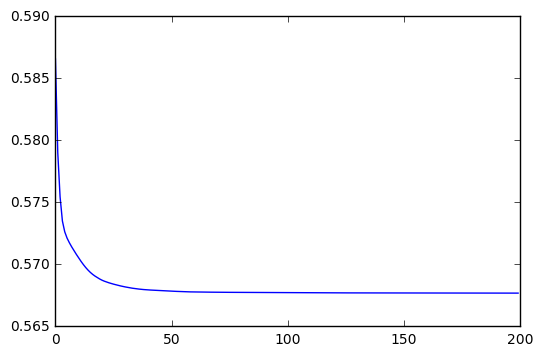

In [23]:
plt.plot(relative_error)

In [24]:
rel_error(A, U.dot(V))

0.5676871997638413

# Sparse Random Matrices

In [2]:
import scipy

In [3]:
m = 1000
n = 100
np.random.seed(0)
B = np.abs(scipy.sparse.rand(m,n))
r = 40

In [ ]:
%%time
U, V, relative_error = structured_randomized_bppnmf(B, algo ='algo42', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

# COMPRESSED BPP WITH ALGO 41

In [11]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo41', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1935 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1940 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1945 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1950 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1955 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5

CPU times: user 1h 4min 36s, sys: 1min 59s, total: 1h 6min 35s
Wall time: 34min 20s


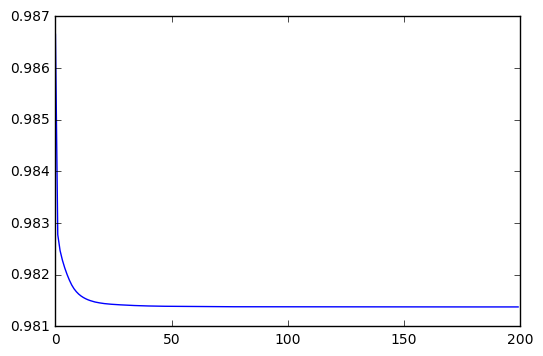

In [12]:
plt.plot(relative_error)

# COMPRESSED BPP WITH QR

In [13]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

CPU times: user 13min 27s, sys: 1min 18s, total: 14min 46s
Wall time: 7min 47s


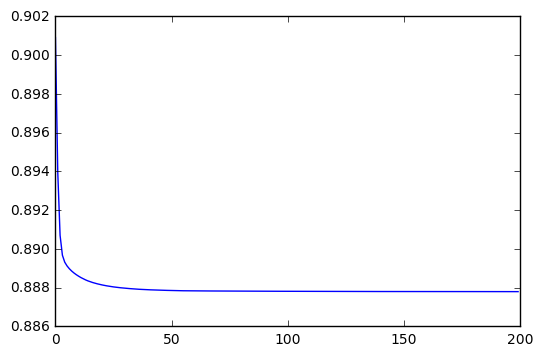

In [14]:
plt.plot(relative_error)

# COMPRESSED BPP WITH ALGO43

In [15]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo43', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1890 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1895 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1900 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1905 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1910 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5

CPU times: user 1h 15min 36s, sys: 2min 33s, total: 1h 18min 9s
Wall time: 16h 49min 49s


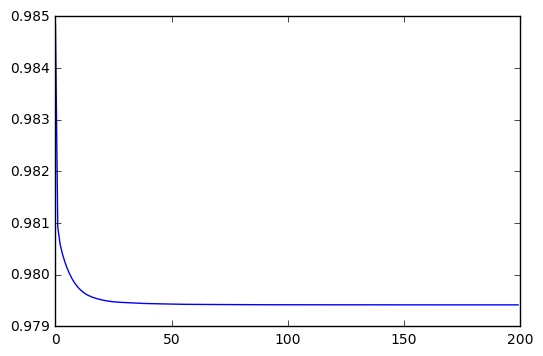

In [16]:
plt.plot(relative_error)

## COMPRESSED BPP WITH ALGO44

In [17]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo44', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1935 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1940 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1945 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1950 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1955 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5

CPU times: user 1h 24min 31s, sys: 2min 37s, total: 1h 27min 8s
Wall time: 47min 58s


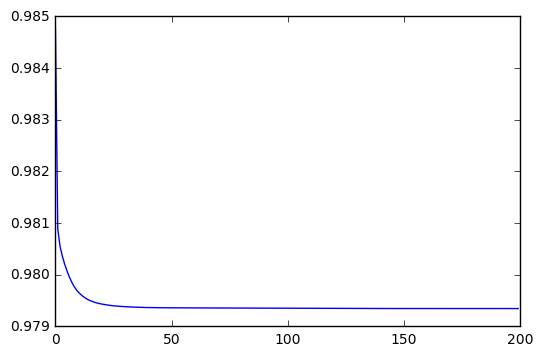

In [18]:
plt.plot(relative_error)

## COMPRESSED BPP WITH STRUCTURED COMPRESSION

In [20]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='structured_compression', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1995 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 2000 reached. Increase it to improve convergence.
  ConvergenceWarning)


CPU times: user 11min 35s, sys: 46.8 s, total: 12min 22s
Wall time: 6min 37s


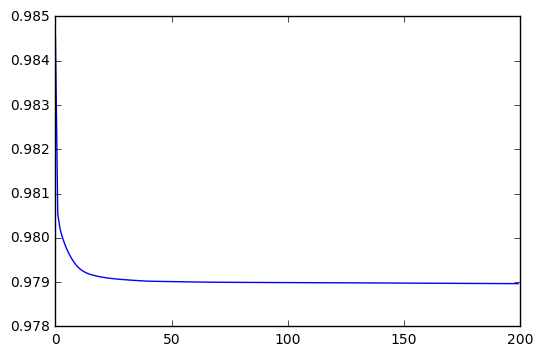

In [21]:
plt.plot(relative_error)

## COMPRESSED BPP WITH COUNT GAUSSIAN

In [22]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='count_gauss', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

CPU times: user 12min 25s, sys: 54.5 s, total: 13min 19s
Wall time: 8min 48s


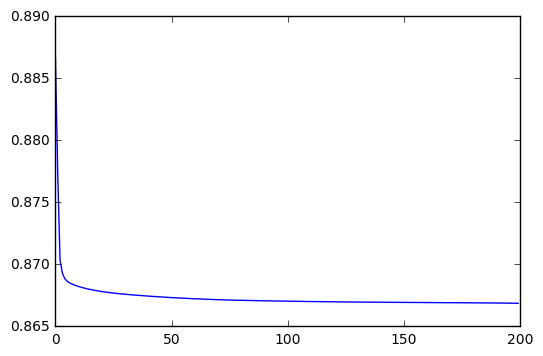

In [23]:
plt.plot(relative_error)

# UNCOMPRESSED BPP IMPLEMENTATION

In [8]:
%time W, H, _, _ = nmf(A, n_components=r, max_iter=200, random_state=2)

CPU times: user 1h 41min 1s, sys: 4min 24s, total: 1h 45min 26s
Wall time: 58min 39s


In [9]:
rel_error(A, W.dot(H))

0.4547736894583318

## Applying the Method to CMS Dataset

In [2]:
# this function will be in a future version of zeku, once it is ported to python 3
import math
import itertools

def plot_images(mpl_plt, images, image_shape, layout=None, titles=None,
                cmap='gray', **kwargs):
    """
    Plots sequence of images.

    Parameters
    ----------
    mpl_plt : matplotlib.plot
        A matplotlib plot handler.

    images : array-like
        An array of images, all of the same shape.

    image_shape : 2-tuple
        The 2-dimensional shape of each image.

    layout : 2-tuple (optional)
        Tuple of form (n_rows, n_cols) describing layout of images.
        If None, automatically calculates the most-square layout.

    titles : array-like (optional)
        An array of titles.  Should be same length as images.

    cmap : matplotlib.colormap (optional)
        A colormap for the images. Default is 'gray'.

    kwargs : key-value pairs (optional)
        Keyword arguments to be passed to mpl_plt.

    Returns
    -------
    fig : matplotlib.plot.Figure
        Matplotlib figure.
    """
    n = len(images)
    if layout:
        n_rows, n_cols = layout
    else:
        n_rows = int(math.ceil(math.sqrt(n)))
        if n <= n_rows * (n_rows - 1):
            n_cols = n_rows - 1
        else:
            n_cols = n_rows
    titles = titles or range(n)
    if len(titles) != n:
        raise ValueError('titles should be the same length as images')
    fig, axes = mpl_plt.subplots(n_rows, n_cols, **kwargs)
    if n_rows == 1:
        pairs = range(n_cols)
    elif n_cols == 1:
        pairs = range(n_rows)
    else:
        pairs = itertools.product(range(n_rows), range(n_cols))
    pairs = list(pairs)[:n]
    for title, image, pair in zip(titles, images, pairs):
        axes[pair].imshow(image.reshape(*image_shape), cmap='gray')
        axes[pair].set_title('%s' % title)

In [3]:
from scipy import io
from sklearn.externals import joblib

In [4]:
swimmers = joblib.load('/Users/user/Desktop/swimmers.pkl') 

In [5]:
np.shape(swimmers)

(32, 32, 256)

In [6]:
swimmers_matrix = swimmers.reshape(1024, 256).T

In [7]:
swimmers_list = [swimmers[:, :, i] for i in range(swimmers.shape[2])]

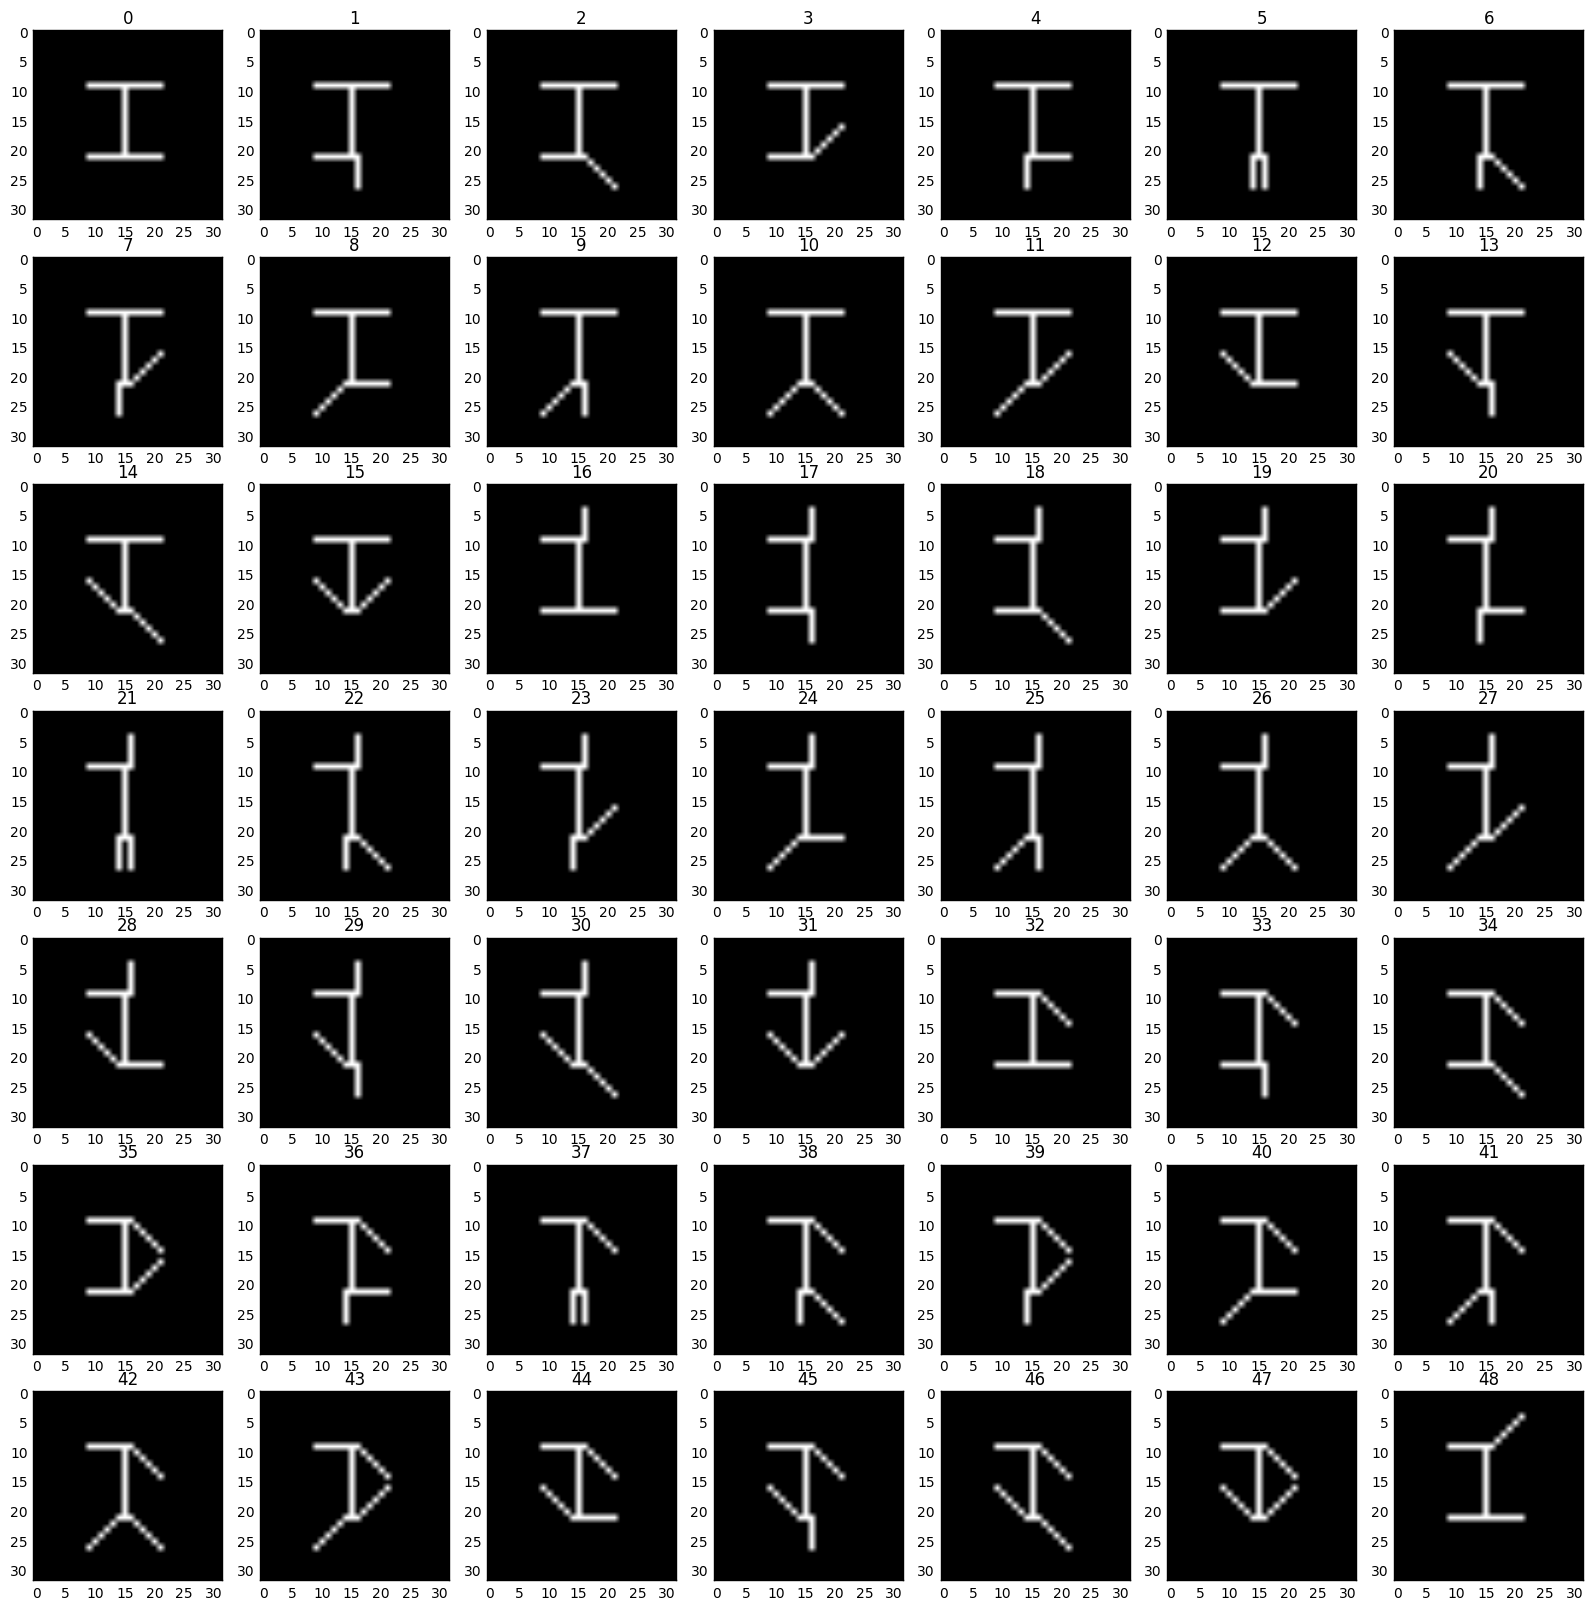

In [8]:
plot_images(plt, swimmers_list[:49], (32, 32), figsize=(20, 20))

In [12]:
def reconstruction_error(M, WH):
    """
    This function computes the relative error of a sparse matrix. By concept, this computation is almost the same with
    computing the reconstruction error of the factor matrices formed using python non-negative matrix factorization
    
    Accepts
    -------
    M  : array-like
    WH : the product of the loading matrix W and the coefficient matrix H
    
    Returns
    -------
    a float-value corresponding to the reconstruction error
    """
    
    nonzero_row, nonzero_col = M.nonzero()
    orig = M.todense()[nonzero_row, nonzero_col]
    reconstructed = WH[nonzero_row, nonzero_col]
    
    return np.linalg.norm(orig - reconstructed)

In [13]:
%%time
U, V, relative_error = structured_randomized_bppnmf(swimmers_matrix, algo='algo43', q=10, r=16, max_iter = 1000, eps = 1e-10, oversampling = 20, 
                     oversampling_factor = 10, random_state=15)

CPU times: user 4.48 s, sys: 746 ms, total: 5.22 s
Wall time: 4.64 s


In [14]:
relative_error

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [18]:
%time W, H, _, _ = nmf(swimmers_matrix, n_components=16, max_iter=200, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 100 reached. Increase it to improve convergence.
  ConvergenceWarning)


CPU times: user 3.18 s, sys: 395 ms, total: 3.58 s
Wall time: 3.32 s


In [19]:
rel_error(swimmers_matrix, W.dot(H))

0.10800643121222232

In [ ]:
%%time
U, V, relative_error = nmf(swimmers_matrix, algo='algo43', q=10, r=16, max_iter = 1000, eps = 1e-10, oversampling = 20, 
                     oversampling_factor = 10, random_state=15)